# Exercise: Neural Network Basics in Keras

# Prithvi Poddar (17191)

# Part One:

---    
### Building model with single hidden layer and more than 300,000 trainable parameter.


In [ ]:
#importng the desired libraries
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
mnist_num_classes = 10 
mnist_image_size = 784

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_data = train_images.reshape(train_images.shape[0], mnist_image_size)
test_data = test_images.reshape(test_images.shape[0], mnist_image_size)

In [ ]:
train_labels = to_categorical(train_labels, mnist_num_classes)
test_labels = to_categorical(test_labels, mnist_num_classes)

In [ ]:
def plot_training_history(history, model):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [ ]:
model_1 = Sequential()
model_1.add(Dense(units = 400, activation='sigmoid', input_shape=(mnist_image_size,)))
model_1.add(Dense(units=mnist_num_classes, activation='softmax'))
model_1.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights, biases = model_1.layers[0].get_weights()
print(weights.shape)
print(biases.shape)

(784, 400)
(400,)


Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5070 - accuracy: 0.8672 - val_loss: 0.2801 - val_accuracy: 0.9267
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2922 - accuracy: 0.9200 - val_loss: 0.2198 - val_accuracy: 0.9425
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2419 - accuracy: 0.9319 - val_loss: 0.1943 - val_accuracy: 0.9482
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2167 - accuracy: 0.9396 - val_loss: 0.1775 - val_accuracy: 0.9528
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1996 - accuracy: 0.9437 - val_loss: 0.1653 - val_accuracy: 0.9558
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1846 - accuracy: 0.9480 - val_loss: 0.1606 - val_accuracy: 0.9600
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1750 - accuracy: 0.9524 - val_loss: 0.1471 - val_accuracy:

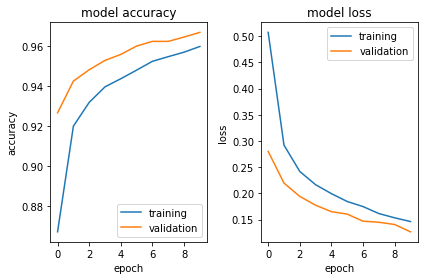

313/313 [==============================] - 1s 2ms/step - loss: 0.1507 - accuracy: 0.9568
Test loss: 0.151
Test accuracy: 0.957


In [ ]:
history = model_1.fit(train_data, train_labels, batch_size=32, epochs=10, verbose=True, validation_split=0.1)
plot_training_history(history, model_1)

-> The model above, has **318010 trainable parameters**. It has a **single hidden layer with 400 nodes.**    
-> Number of **weights in the model is 784 x 400 = 313600** and the **number of biases are 400**.    
-> After 10 epochs, we can see that the model has similar performance on training, testing and validation sets. **Training accuracy is 95.98%, validation accuracy is 96.68% and test accuracy is 95.68%.**    
-> Each epoch took 4 seconds to complete, on google Colab cloud gpu

### Building model with single hidden layer and fewer than 50,000 trainable parameter.

In [ ]:
model_1 = Sequential()
model_1.add(Dense(units = 64, activation='sigmoid', input_shape=(mnist_image_size,)))
model_1.add(Dense(units=mnist_num_classes, activation='softmax'))
model_1.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights, biases = model_1.layers[0].get_weights()
print(weights.shape)
print(biases.shape)

(784, 64)
(64,)


Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.8455 - accuracy: 0.7876 - val_loss: 0.4749 - val_accuracy: 0.8912
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4711 - accuracy: 0.8773 - val_loss: 0.3577 - val_accuracy: 0.9143
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4042 - accuracy: 0.8911 - val_loss: 0.3283 - val_accuracy: 0.9170
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3651 - accuracy: 0.8980 - val_loss: 0.3022 - val_accuracy: 0.9193
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3483 - accuracy: 0.9026 - val_loss: 0.2820 - val_accuracy: 0.9227
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3372 - accuracy: 0.9057 - val_loss: 0.2679 - val_accuracy: 0.9297
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3159 - accuracy: 0.9099 - val_loss: 0.2699 - val_accuracy:

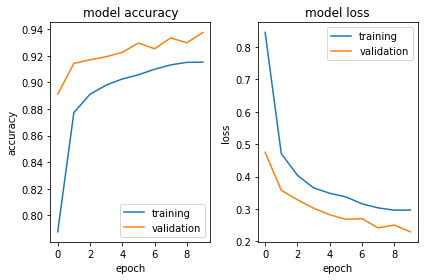

313/313 [==============================] - 1s 2ms/step - loss: 0.2727 - accuracy: 0.9209
Test loss: 0.273
Test accuracy: 0.921


In [ ]:
history = model_1.fit(train_data, train_labels, batch_size=32, epochs=10, verbose=True, validation_split=0.1)
plot_training_history(history, model_1)

-> The model above, has **50890 trainable parameters**. It has a **single hidden layer with 64 nodes.**    
-> Number of **weights in the model is 784 x 64 = 50176** and the **number of biases are 64**.    
-> After 10 epochs, we can see that the model has similar performance on training, testing and validation sets. **Training accuracy is 91.53%, validation accuracy is 93.77% and test accuracy is 93.77%.**    
-> Each epoch took 4 seconds to complete, on google Colab cloud gpu

# Part two:   

---   
1. First model has 15 hidden layers with 9 nodes each    
2. Second model has 15 hidden layers with 41 nodes each    
3. Third model has 15 hidden layers with 97 nodes each

In [ ]:
model_2_1 = Sequential()
model_2_1.add(Dense(units = 9, activation='sigmoid', input_shape=(mnist_image_size,)))
for _ in range(15):
    model_2_1.add(Dense(units = 9, activation = 'sigmoid'))
model_2_1.add(Dense(units=mnist_num_classes, activation='softmax'))
model_2_1.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_2_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 9)                 7065      
_________________________________________________________________
dense_7 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_8 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_12 (Dense)             (None, 9)                

Epoch 1/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3114 - accuracy: 0.1090 - val_loss: 2.3022 - val_accuracy: 0.1050
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3017 - val_accuracy: 0.1050
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3022 - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3014 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy:

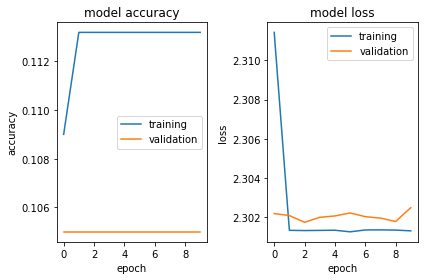

313/313 [==============================] - 1s 2ms/step - loss: 2.3013 - accuracy: 0.1135
Test loss: 2.3
Test accuracy: 0.113


In [ ]:
history = model_2_1.fit(train_data, train_labels, batch_size=32, epochs=10, verbose=True, validation_split=0.1)
plot_training_history(history, model_2_1)

In [ ]:
model_2_2 = Sequential()
model_2_2.add(Dense(units = 41, activation='sigmoid', input_shape=(mnist_image_size,)))
for _ in range(15):
    model_2_2.add(Dense(units = 41, activation = 'sigmoid'))
model_2_2.add(Dense(units=mnist_num_classes, activation='softmax'))
model_2_2.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_2_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 41)                32185     
_________________________________________________________________
dense_24 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_25 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_26 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_27 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_28 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_29 (Dense)             (None, 41)               

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3084 - accuracy: 0.1113 - val_loss: 2.3032 - val_accuracy: 0.1050
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 2.3020 - accuracy: 0.1106 - val_loss: 2.3033 - val_accuracy: 0.1050
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 2.3020 - accuracy: 0.1109 - val_loss: 2.3036 - val_accuracy: 0.1050
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3023 - accuracy: 0.1117 - val_loss: 2.3024 - val_accuracy: 0.1050
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3020 - accuracy: 0.1120 - val_loss: 2.3029 - val_accuracy: 0.1050
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3021 - accuracy: 0.1126 - val_loss: 2.3027 - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3022 - accuracy: 0.1127 - val_loss: 2.3030 - val_accuracy:

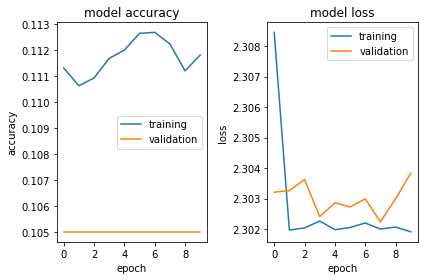

313/313 [==============================] - 1s 2ms/step - loss: 2.3022 - accuracy: 0.1135
Test loss: 2.3
Test accuracy: 0.113


In [ ]:
history = model_2_2.fit(train_data, train_labels, batch_size=32, epochs=10, verbose=True, validation_split=0.1)
plot_training_history(history, model_2_2)

In [ ]:
model_2_3 = Sequential()
model_2_3.add(Dense(units = 97, activation='sigmoid', input_shape=(mnist_image_size,)))
for _ in range(15):
    model_2_3.add(Dense(units = 97, activation = 'sigmoid'))
model_2_3.add(Dense(units=mnist_num_classes, activation='softmax'))
model_2_3.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_2_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 97)                76145     
_________________________________________________________________
dense_41 (Dense)             (None, 97)                9506      
_________________________________________________________________
dense_42 (Dense)             (None, 97)                9506      
_________________________________________________________________
dense_43 (Dense)             (None, 97)                9506      
_________________________________________________________________
dense_44 (Dense)             (None, 97)                9506      
_________________________________________________________________
dense_45 (Dense)             (None, 97)                9506      
_________________________________________________________________
dense_46 (Dense)             (None, 97)               

Epoch 1/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3068 - accuracy: 0.1057 - val_loss: 2.3042 - val_accuracy: 0.1050
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3033 - accuracy: 0.1086 - val_loss: 2.3040 - val_accuracy: 0.1050
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3032 - accuracy: 0.1089 - val_loss: 2.3029 - val_accuracy: 0.1050
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.1086 - val_loss: 2.3036 - val_accuracy: 0.1050
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3032 - accuracy: 0.1100 - val_loss: 2.3029 - val_accuracy: 0.1045
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3030 - accuracy: 0.1058 - val_loss: 2.3041 - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3030 - accuracy: 0.1091 - val_loss: 2.3019 - val_accuracy:

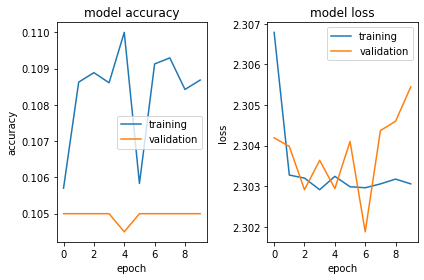

313/313 [==============================] - 1s 2ms/step - loss: 2.3039 - accuracy: 0.1135
Test loss: 2.3
Test accuracy: 0.113


In [ ]:
history = model_2_3.fit(train_data, train_labels, batch_size=32, epochs=10, verbose=True, validation_split=0.1)
plot_training_history(history, model_2_3)

---   
Looking at the results, we can see that none of the models reached even 20% accuracy.

### My hypothesis:   
This was due to gradient vanishing. We used sigmoid funtion for activation and stochastic gradient descent for training.   
Let us take a look at the sigmoid function and its first derivative:   
    
$\sigma(x) = \frac{1}{1+e^{-x}}$   
    
$\frac{\delta(\sigma(x))}{\delta x} = \frac{1}{1+e^{-x}} [1-\frac{1}{1+e^{-x}}] $   
     
Let us plot these equations and see:

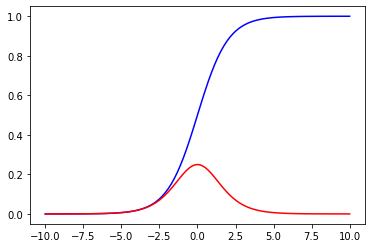

In [ ]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
    
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

r = np.linspace(-10, 10, 100)
plt.plot(r, sigmoid(r), 'b')
plt.plot(r, sigmoid_prime(r), 'r')
plt.show()

Notice that at both ends of the range the derivative (red line) approaches 0. In terms of tuning neural networks, this means that the corrections applied based on the loss function can become very small—causing the node to effectively stop learning. As the number of layers increase in the network, the number of derivatives taken increases. This can be shown by the chain rule of differentiation:   
$\frac{\delta error}{\delta w1} = \frac{\delta error}{\delta output} * \frac{\delta output}{\delta hidden_n} * \frac{\delta hidden_n}{\delta hidden_{n-1}} * ..... * \frac{\delta hidden_1}{\delta w1}$       
This causes multiplication of many small numbers, making the final derivative extremely small. This then results in the vanishing grdient problem.

The first model has 8515 trainable parameters.   
The second model has 58435 trainable parameters.    
The third model has 219715 trainable parameters.   
Yet, all of them performed equally bad. On the other hand, the part one model had 300,000 and 50,000 parameters but they performed really good. Hence we can say that there is **no corelation between number of parameters and accuracy**, when it comes to vanishing gradient problem.

# Part three:   

---   
Building a network with at least 3 hidden layers that achieves better than 92% accuracy on validation and test data.

In [ ]:
model_3 = Sequential()
model_3.add(Dense(units = 512, activation='sigmoid', input_shape=(mnist_image_size,)))
model_3.add(Dense(units = 128, activation='sigmoid'))
model_3.add(Dense(units = 64, activation='sigmoid'))
model_3.add(Dense(units=mnist_num_classes, activation='softmax'))
model_3.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_58 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_59 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_60 (Dense)             (None, 10)                650       
Total params: 476,490
Trainable params: 476,490
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
1688/1688 [==============================] - 5s 3ms/step - loss: 1.9730 - accuracy: 0.4883 - val_loss: 1.4715 - val_accuracy: 0.7037
Epoch 2/50
1688/1688 [==============================] - 4s 3ms/step - loss: 1.0646 - accuracy: 0.7712 - val_loss: 0.7079 - val_accuracy: 0.8822
Epoch 3/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.6106 - accuracy: 0.8728 - val_loss: 0.4441 - val_accuracy: 0.9153
Epoch 4/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4319 - accuracy: 0.9007 - val_loss: 0.3322 - val_accuracy: 0.9257
Epoch 5/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3461 - accuracy: 0.9158 - val_loss: 0.2765 - val_accuracy: 0.9337
Epoch 6/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2985 - accuracy: 0.9241 - val_loss: 0.2416 - val_accuracy: 0.9422
Epoch 7/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2650 - accuracy: 0.9311 - val_loss: 0.2196 - val_accuracy:

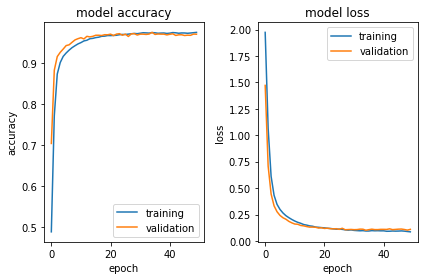

313/313 [==============================] - 1s 2ms/step - loss: 0.1140 - accuracy: 0.9646
Test loss: 0.114
Test accuracy: 0.965


In [ ]:
history = model_3.fit(train_data, train_labels, batch_size=32, epochs=50, verbose=True, validation_split=0.1)
plot_training_history(history, model_3)

The above network gives an accuracy of 96.5% on the test data as compared to an accuracy of 95.7% of the first network on the test data. The 3 layered network was trained for 50 epochs whereas the first network was trained for 10 epochs.